In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
from sklearn.datasets import make_blobs

In [4]:
X, y= make_blobs(random_state=42, centers=2)

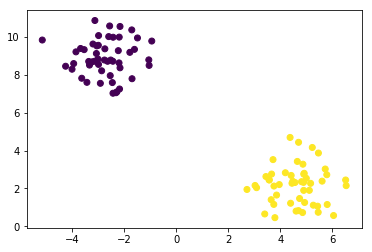

In [8]:
plt.scatter(X[:,0], X[:,1], c=y)

In [11]:
model= LogisticRegression()

In [12]:
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
model.intercept_

array([0.18389195])

In [14]:
model.coef_

array([[ 1.37564164, -0.34951798]])

In [21]:
class CustomLogisticRegression:
    
    def __init__(self, lr=.1, max_iters=20):
        self.lr = lr
        self.max_iters = max_iters
        
    def fit(self, X, y):
        
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        
        self.theta_ = np.random.randn(X.shape[1], 1)
        
        for i in range(self.max_iters):
            self.gradient_accend(X,y)
            
    def gradient_accend(self,X,y):
        delta_theta = self.gradient(X, y)
        self.theta_ += delta_theta
        
    def gradient(self, X, y):
        yh = self.hypothesis(X)
        ya = y.reshape(-1, 1)
        diff = yh-ya
        
        dll2theta = np.dot(X.T, diff) / len(X)
        return -dll2theta*self.lr
        
    def hypothesis(self, X):
        g = np.dot(X, self.theta_)
        return 1/(1 + np.exp(-g))

In [27]:
model = CustomLogisticRegression(max_iters=100)

In [28]:
model.fit(X, y)

In [29]:
model.theta_

array([[-0.29451049],
       [ 1.24104289],
       [-0.25135594]])